In [1]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

from PIL import Image, ImageFilter
from IPython import display

import numpy as np

from matplotlib.pyplot import imshow
%matplotlib inline

In [2]:
import squeezedet as nn
net = nn.init()

INFO:tensorflow:Summary name mean iou is illegal; using mean_iou instead.
INFO:tensorflow:Restoring parameters from ./squeezeDet/data/model_checkpoints/squeezeDet/model.ckpt-87000


In [3]:
from gen_pic_utils import *
import populate_library

lib = populate_library.populateLibrary()

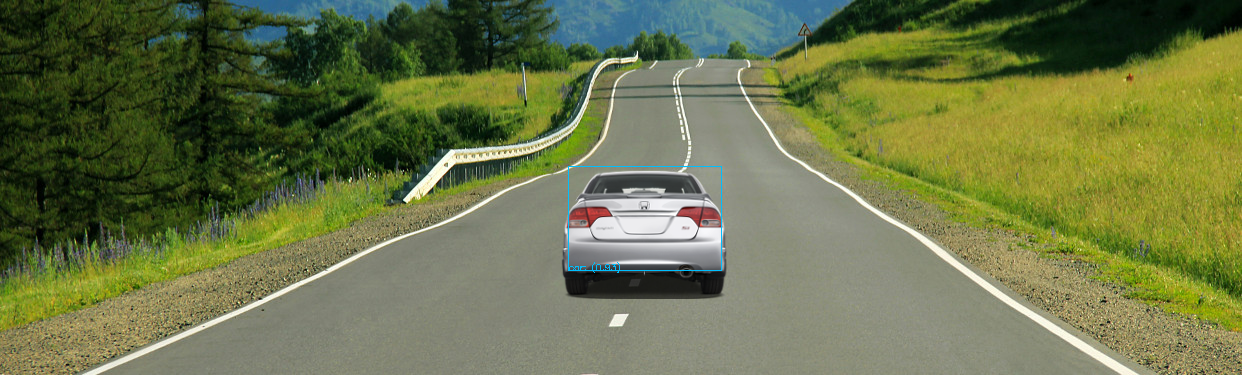

Class | Score | IOU
0 | 0.933574 | 0.689200118038


In [4]:
def print_pred((boxes,probs,cats),gt_box):
    print('Class | Score | IOU')
    for box,prob,cat in zip(boxes,probs,cats):
        out = str(cat) + ' | ' + str(prob) + ' | '
        if cat == 0:
            out += str(nn.iou(box,gt_box))
        print(out)

def test_image(car,road,x,y,color,contrast,brightness,sharpness):
    box, image = generatePicture(lib, [x,y,color,contrast, brightness, sharpness], 'test.png', road, car)
    pred = nn.classify('./test.png',net) 
    display.display(Image.open("tmp.png"))
    print_pred(pred,box)
    
@interact(car=(7,11,1),road=(56,61,1),x=(0,1,0.01), y=(0,1,0.01), color=(0,2,0.01), contrast=(0,2,0.01), brightness=(0,2,0.01), sharpness=(0,2,0.01))
def analyze(car=8,road=56,x=0.5, y=0,color=1,contrast=1,brightness=1,sharpness=1):
    return test_image(car,road,x,y,color,contrast,brightness,sharpness)

0.0